# Péndulo ideal

[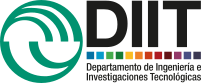](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

Bibliografía:  
- Secciones 1.1 y 1.2  
  Ondas es física  
  Oscar E. Martinez   
  EUdeBA, 2008

# Enunciado
Obtenga la ecuación diferencial que describe la dinámica de una pesa que "pendulea" en el extremo de una cuerda.  
![](figuras/pénduloHorizontal.png)  
<!--
![](figuras/marion_fig7_1.png)
-->

1. Asumiendo que el péndulo oscila dentro del plano \\(\hat{x}, \hat{y}\\).
¿En que sistema de coordenadas resolverá el problema? 
¿Cuál coordenada es relevante para describir la dinámica? 
1. Enumere las aproximaciones del modelo de péndulo que resolverá que lo diferencian de uno que puede armar en el laboratorio.
1. Calcule la energía potencial de la pesa en el campo gravitatorio.
¿Para qué sirve eso?
Las fuerzas que surgen de un campo son fácilmente calculables usando que \\(\vec{F} = - \vec{\nabla} V\\), es decir, _la fuerza es igual al negativo del gradiente del potencial_.
1. Escriba la 2.a ley de Newton y proyecte en la dirección de la coordenada relevante.
1. Resuelva la ecuación de la dinámica y obtenga la frecuencia de oscilación.  

# ¿Cómo plantear la resolución?
Recordamos que una vez hechas todas las aproximaciones para tratar al sistema como puntual y plantear un diagrama de cuerpo libre que nos permita entender que fuerzas actuan sobre tal partícula hay que llegar a plantear la **2.a ley de Newton**.

La escribiremos en función de la coordenada de interés en torno de la posición de punto de equilibrio. Para lograr esto hay dos alternativas:
- Determinar el punto de equilibrio en que $\sum \vec{F} = 0$ y escribir la descomposición de las $\vec{F}$ en la dirección de la mencionada coordenada.
- Escribir el potencial, encontrar su mínimo en función de la coordenada y desarrollarlo en serie en torno al mismo. Luego basta usar $\vec{F} = - \vec{\nabla} V$

El 2.o enfoque puede parecer tedioso a primera vista, pero se torna más y más práctico cuando el sistema se torna más complejo. Obviamente para los primeros ejercicios puede parecer impráctico, pero es bueno entrenarse en este proceder para preparse para lo que viene en la materia.

### Dibujo
Es una buena idea empezar haciendo un dibujo del sistema que se quiere estudiar.
Además de los "datos" $g,l$ debemos suponer que del péndulo cuelga alguna pesa con cierta masa $m$.

En el dibujo indico dos posibles coordenadas que podriamos usar para analizar al apartamiento de la posicíon vertical (de equilibrio): el ángulo $\varphi$, o el apartamiento horizontal $\psi$.

### Aproximaciones
Revisemos los aproximaciones que se asumieron implicitamente en el dibujo: 
- El movimiento siempre es en un plano. Siempre arriba o abajo, derecha o izquierda, pero nunca entra o sale de la pantall. Por tanto toda posición que asignemos tendrá componentes solo en los versores $\hat{r}$ y $\hat{\varphi}$.
- La cuerda es rígida, es decir no se curva, y es inextensible $\implies$ la posición de la masa es $\vec{r}= \ell \hat{r}$. 

### Del potencial a la 2.a ley de Newton
Considero que el potencial $V$ es nulo en el origen de coordenadas, es decir que donde se encuentra su mínimo $\varphi=0, V(\varphi=0)= -m g \ell$ y por tanto
$$
V(\varphi)= m g \left(-\ell \cos{\varphi} \right) = - m g \ell \cos{\varphi},
$$

Como vemos la aproximación funciona bastante bien.
Conformes con ella calculamos la fuerza
$$
\vec{F} = - \vec{\nabla}V = - \left( \frac{\partial}{\partial r}, \frac{1}{r} \frac{\partial}{\partial \varphi}, \frac{\partial}{\partial z} \right) V(\varphi)
$$

Pero solo nos interesa expresar la 2.a ley de Newton para lo que pasa en $\hat{\varphi}$

$$
m \ddot{\vec{r}} \cdot \hat{\varphi} 
= -\frac{1}{r} \frac{\partial}{\partial \varphi} V(\varphi)
$$

En el lado izquierdo de la expresión de la aceleración en cílindricas $\ddot{\vec{r}}= (\ddot r - r \dot{\varphi}^2) \hat{r} + (\dot{r} \dot{\varphi}^2 + r \ddot{\varphi}) \hat{\varphi} + \ddot{z} \hat{z}$, nos quedamos solo con la componente en $\hat{\phi}$,
$$
\ddot{\vec{r}} \cdot \hat{\varphi} = \dot{r} \dot{\varphi}^2 + r \ddot{\varphi}
$$
y como el hilo del péndulo es rígido e inextensible $r \equiv \ell$ solo queda de esto
$$
\ddot{\vec{r}} \cdot \hat{\varphi} =  \ell \ddot{\varphi}
$$

En el lado derecho la derivada del potencial respecto a $\varphi$ es
$$
\frac{\partial}{\partial \varphi} V(\varphi) = m g \ell \sin(\varphi )
$$

Reemplazando esto en la expersión anterior
$$
\begin{aligned}
m \ell \ddot{\varphi} &= - \frac{1}{\ell} m g \ell \sin(\varphi)\\
\ddot{\varphi} &= - \frac{g}{\ell}\sin(\varphi)\\
\end{aligned}
$$
Y arribamos a una ecuación diferencial que en principio no sabemos resolver analíticamente pues no es lineal.

## Resolución de la ecuación diferencial
Voy a repasar todos los pasos para esta resolución, que de ahora en más podrán obviarse en otros problemas, pero es bueno haberlo revisto en su totalidad.

### Linealización de la 2.a ley de Newton
El potencial presenta un mínimo en $\varphi = 0$.
La oscilación se producirá en torno a ese ángulo.

Realizando un desarrollo en serie de Taylor, o más específicamente de Maclaurin pues se desarrolla en torno al cero, puede obtenerse una aproximación lineal
$$
\sin(\varphi )
= \sin(0) + \cos(0) \varphi - \frac{\sin(0)}{2} \varphi^2 + \dots
\simeq \varphi
$$

Con esto puede escribirse una aproximación lineal a la ecuación diferencial
$$
\ddot{\varphi} = - \frac{g}{\ell} \varphi
$$

### La frecuencia de oscilación
Proponemos una solución $\varphi= \mathrm{e}^{\lambda t}$ que al aplicarla a la ecuación anterior

$$
    \begin{aligned}
    \lambda^2 \mathrm{e}^{\lambda t} &= - \frac{g}{l} \mathrm{e}^{\lambda t} \\
    \lambda^2 &= -\frac{g}{\ell} \\
    \lambda &= \pm \sqrt{\frac{g}{\ell}} i
    \end{aligned}
$$

Entonces la ecuación tiene por solución la combinación lineal de las dos correspondientes soluciones ($\pm$)

$$
    \varphi(t)= A_1 \mathrm{e}^{i \sqrt{\frac{g}{\ell}} t}+ A_2 \mathrm{e}^{-i \sqrt{\frac{g}{\ell}} t} .
$$

Estas exponenciales son períodicas en $\sqrt{\frac{g}{\ell}}$ por lo que este coeficiente de $t$ lo identificamos con la frecuencia angular $\omega= \sqrt{\frac{g}{\ell}}$

$$
    \varphi(t)= A_1 \mathrm{e}^{i \omega t}+ A_2 \mathrm{e}^{-i \omega t} .
$$

__Sugerencia (MR):__ La propuesta de solución que usamos es típica de la ecuación diferencial que nos tocó resolver. ¿Qué propuesta hacemos? es altamente dependiente de la ecuación diferencial y puede ser muy compleja de obtener. 

### Encontrando una solución real
No queremos un $\varphi$ complejo, sino uno real. Así que aplicamos el truco de sumar a la solución anterior su adjunta $\bar{\varphi}(t)$.
$$
\begin{aligned}
\Re{(\varphi(t))} 
&= \frac{1}{2} \left[ \varphi(t) + \bar{\varphi}(t) \right]  \\
& = \frac{1}{2} \left[ A_1 \mathrm{e}^{i \omega t}+ A_2 \mathrm{e}^{-i \omega t} + A_1^* \mathrm{e}^{-i \omega t}+ A_2^* \mathrm{e}^{i \omega t} \right] \\
&= \frac{1}{2} \left[ (A_1+ A_2^*) \mathrm{e}^{i \omega t}+ (A_1^*+ A_2) \mathrm{e}^{-i \omega t} \right] \\
&= \frac{1}{2} (A_1+ A_2^*) \mathrm{e}^{i \omega t}+ \text{complejo conjugado} .
\end{aligned}
$$

El obtener la adjunta es hacer dos cosas:
- conjugar los números complejos: cambiar el signo de sus argumentos, y
- transponer: en el caso más general los $A_n$ son vectores, no es el caso del péndulo, en que $A_n$ son solo un número. Por tanto $A_n^*$ denota al complejo conjugado de $A_n$.

Lo que acompaña la exponencial $\frac{1}{2} (A_1+ A_2^*)$ es un número complejo que puede resumirse en $B \mathrm{e}^{i \phi_0}$.
Con esto se puede escribir una solución real

$$
\begin{aligned}
\varphi(t) 
&= B \mathrm{e}^{i (\omega t+ \phi_0)} + B \mathrm{e}^{- i (\omega t+ \phi_0)} \\
&= B \left[ \cos{\left( \omega t+ \phi_0 \right) } + i \sin{\left( \omega t+ \phi_0 \right) } \right] 
 + B \left[ \cos{\left( \omega t+ \phi_0 \right) } - i \sin{\left( \omega t+ \phi_0 \right) } \right] \\
&= 2 B \cos{\left( \omega t+ \phi_0 \right) } \\
&= \boxed{ A \cos{\left( \omega t+ \phi_0 \right) } } \quad (2B =A)
\end{aligned}
$$

Y voilá, se obtiene la buscada ecuación de movimiento.
Pero aún no está determinada a menos que se conozcan las condiciones en algún $t$ de referencia para establecer:
- $A$ una amplitud máxmima de la oscilación $A$, y
- $\phi_0$ una fase inicial de la función trigonométrica (que tan alejada se encuentra la situación inicial de la máxima amplitud).

__Sugerencia (MR)__: La dependencia de $A$ con las condiciones iniciales es la que nos llevó a simplificar la ecuación definiendo $2B = A$, es una constante a determinar por condiciones iniciales. 

### Condiciones iniciales
En el problema del péndulo obtuvimos una solución que había que especializar en función de condiciones iniciales de amplitud máxima $A$ y de una un tanto "esotérica" fase inicial $\phi_0$, que para este problema sería
$$
  \varphi(t) = A \cos{\left( \omega t + \phi_0 \right)}.
$$

Antes de llegar a esta versión compacta habriamos pasado, cuando analizamos la frecuencia de oscilación, por la expresión
$$
\varphi(t)= A_1 \mathrm{e}^{i \omega t}+ A_2 \mathrm{e}^{-i \omega t},
$$

pero aquí ahorramos tiempo y utilizamos las relaciones de Euler $\mathrm{e}^{\pm i \theta}= \cos{\theta}+ i \sin{\theta}$ para escribir
$$
\varphi(t)= (A_1+ A_2) \cos{(\omega t)} +  i (A_1- A_2) \sin{(\omega t)}.
$$

Esta expresión es muy práctica pues si especializamos esta solución en $t=0$ solo queda $(A_1+ A_2)$, por lo que esto es $\varphi(0)$.
De igual manera la derivada en $t=0$ de tal solución $i \omega (A_1 - A_2)$ corresponderá a $\dot{\varphi}(0)$, entonces
$$
\begin{aligned}
  \varphi(0) &= (A_1 + A_2)\\
  \dot{\varphi}(0) &= i \omega (A_1 - A_2)
\end{aligned},
$$

permite escribir una solucíon en función de condiciones iniciales observables:
$$
\boxed{
  \varphi(t)= \varphi(0) \cos{(\omega t)} +  \frac{\dot{\varphi}(0)}{\omega} \sin{(\omega t)}
}.
$$

## Dinámica

In [ ]:
# Primero importamos las bibliotecas de Python que vamos a usar
import numpy as np # numpy, de cálculo numérico, para vectores y matrices
import matplotlib.pyplot as plt # matplotlib para graficar
plt.style.use('fivethirtyeight')

Text(0, 0.5, '$\\varphi$ [rad]')

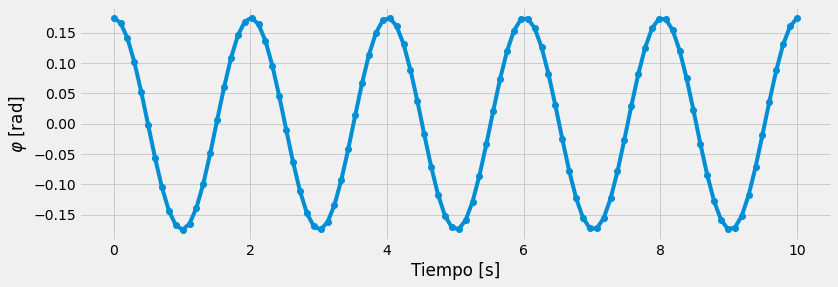

In [ ]:
# condiciones iniciales péndulo
g = 9.81 # [m s-2]
l = 1 #  [m] longitud de la cuerda
omega = np.sqrt(g/l) # [rad s-1] frecuencia de oscilación
phi_0 = 10 # [⁰] amplitud inicial en grados
phi_0 *= np.pi/ 180 # [rad] grados -> radianes, *= multiplica el valor anterior de la variable
phi_punto_0 = 0 # [rad s-1] velocidad (angular) inicial

tiempos = np.linspace(0, 10, 100) # [s] 100 tiempos equiespaciados entre 0 y 10 s
def phi(t): # se puede hacer una función en vez de calcular un vector a partir de los tiempos
    return phi_0* np.cos(omega* t) + (phi_punto_0/ omega)* np.sin(omega* t)

# graficación
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(tiempos, phi(tiempos), 'o-' )
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel(r'$\varphi$ [rad]')

## ODE (sugerencia inclusión de ejercicio)

Tal vez se podría incluir en los ejercicios el paquete de ODE y proponerles que resulvan el problema de forma numérica. Mostrándoles las virtudes de plantearlo y resolverlo analíticamente frente a una solución numérica, que les requeriría un esfuerzo de estudio de condiciones iniciales. 

Con esto se les puede enseñar el uso de paquetes numéricos para resolución y cómo mirar el espacio de parámetros.

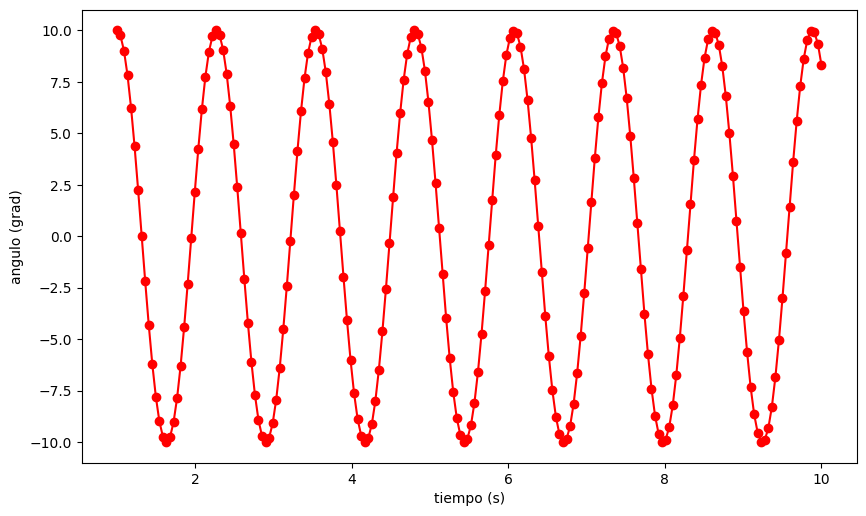

In [8]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=100)

g = 9.81 # gravedad en m/s^2 aproximada
l = 0.4 # longitud hilo en m

# modelo   d2phi/dt2 = -g/l * phi
def model(phi, t):
    return (phi[1], -(g/l)*phi[0])

# condiciones iniciales
ci = [10, 0]
ci[0] *= np.pi / 180

ts = np.linspace(1,10,200) 
phi_s = odeint(model, ci, ts)
ys = phi_s[:,0]




plt.plot(ts,ys*180/np.pi,'r-o')
plt.xlabel('tiempo (s)')
plt.ylabel('angulo (grad)')
plt.show()